# Task Scheduler with Direct Constraints with Tensor Networks

The algorithm is limited to 2GB of memory use in the contraction. To increase it, change the value in the Optimizer class in optimizer.py

## Libraries

In [1]:
#Used libraries
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
from optimizer import basic_use_tn, basic_use_brute_force, basic_use_iterative, Optimizer, IterativeOptimizer
from auxiliar_functions import create_instance, checker
from genetic_algorithm import basic_use_genetic, genetic_optimizer

# Configure matplotlib plot styling
plt.rcParams.update({
    'font.size': 15,
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 10
})

%load_ext autoreload
%autoreload 2

---
# Basic Experiments

## Basic algorithm

Basic use experiments. We test the functionality of the algorithm and the implementation. We write an instance with the rules divided in conditions and their corresponding targets [machine, task]. We also provide the costs_list, of the execution times for each task-machine.

### By hand case

In [2]:
tau = 0.25  

# Define scheduling constraints
# Each condition list represents task dependencies where:
# - Numbers indicate specific tasks that must be scheduled together
# - None indicates any task can be used
# - Target specifies [machine_id, task_id] for the rule
conditions = [
    [None, 0, 0, None, 1],  # Tasks 0,0,1 must be scheduled together
    [1, 2, 0, 2, None],     # Tasks 1,2,0,2 must be scheduled together
    [None, None, 1, 1, 2]   # Tasks 1,1,2 must be scheduled together
]
target = [
    [0, 1],  # Schedule on machine 0, task 1
    [4, 1],  # Schedule on machine 4, task 1  
    [1, 0]   # Schedule on machine 1, task 0
]

# Processing times matrix - each row represents a machine
# and contains processing times for each task
costs_list = [
    [1.1, 2.71],        # Machine 0 - 2 tasks
    [2.16, 5.3, 4.21],  # Machine 1 - 3 tasks
    [2.2, 1.75],        # Machine 2 - 2 tasks
    [4.5, 7.1, 1.05],   # Machine 3 - 3 tasks
    [9.1, 5.1, 0.77]    # Machine 4 - 3 tasks
]

# Format inputs for optimizer
constraints = [conditions, target]
costs_list = [np.array(t) for t in costs_list]

# Run tensor network optimization
result_tn, cost_tn = basic_use_tn(constraints, costs_list, tau)

# Compare against brute force solution
result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)

Greedy solution.
Tensor Network Solution: [0 0 1 2 2]
Total Processing Time: 6.83

Brute Force Solution: [0 0 1 2 2]
Total Processing Time: 6.83


In [3]:
# Time scaling factor for imaginary time evolution
tau = 100  


# Define test constraints with rules and targets
constraints = [
    # Conditions for each rule (machine x task assignments)
    [
        [None, None, 1, 2, 0],  # Rule 1
        [None, None, None, 4, None], # Rule 2
        [1, 2, None, None, None],  # Rule 3
        [None, None, 2, 2, None],  # Rule 4
        [None, None, 0, 2, None],  # Rule 5
        [None, None, 4, 3, None],  # Rule 6
        [1, None, None, 1, None],  # Rule 7
        [4, 4, 4, None, None],   # Rule 8
        [0, None, None, 3, None],  # Rule 9
        [1, 1, None, 4, None],   # Rule 10
        [2, None, None, None, 0],  # Rule 11
        [None, None, 2, None, None], # Rule 12
        [None, None, 0, 3, 3],   # Rule 13
        [2, 3, None, 4, 1],    # Rule 14
        [None, None, 0, None, 1]   # Rule 15
    ],
    # Target assignments [machine, task] for each rule
    [
        [0, 0], [0, 2], [3, 3], [1, 0], [4, 0],
        [4, 3], [1, 3], [4, 4], [1, 2], [4, 0],
        [1, 4], [3, 2], [1, 3], [2, 3], [1, 3]
    ]
]

# Define processing times for each task on each machine
costs_list = [
    [1.733, 3.386, 0.505, 9.468, 8.132],  # Machine 1
    [0.314, 9.355, 4.426, 5.166, 1.003],  # Machine 2
    [5.526, 3.533, 3.938, 0.381, 4.020],  # Machine 3
    [6.547, 9.060, 7.013, 9.608, 2.022],  # Machine 4
    [2.962, 3.958, 4.117, 8.015, 7.206]   # Machine 5
]

# Format inputs for optimizer
costs_list = [np.array(t) for t in costs_list]

# Run tensor network optimization
result_tn, cost_tn = basic_use_tn(constraints, costs_list, tau)

# Compare against brute force solution
result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)


Tensor Network Solution: [2 4 3 4 0]   
Total Processing Time: 6.872999999999999

Brute Force Solution: [2 4 3 4 0]
Total Processing Time: 6.872999999999999


### Random instance

In [4]:
num_constraint = 30
num_machines = 5
tasks_per_machine = 5
tau = 10

np.random.seed(113)

costs_list, constraints = create_instance(num_constraint, num_machines, tasks_per_machine)

# Run tensor network optimization
result_tn, cost_tn = basic_use_tn(constraints, costs_list, tau)

# Compare against brute force solution
result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)

Tensor Network Solution: [4 2 4 2 1]   
Total Processing Time: 10.358592460587104

Brute Force Solution: [4 2 4 2 1]
Total Processing Time: 10.358592460587104


In [5]:
print('Constraints:', constraints)
print('Processing Times Matrix:', costs_list)

Constraints: [[[None, 0, 2, 3, 4], [None, 4, 2, None, 2], [2, 0, None, 4, 0], [None, None, 2, 0, 0], [2, 1, None, 1, 1], [1, 3, None, None, 3], [None, None, None, 4, 3], [None, 1, 1, None, 0], [1, None, 4, 0, 4], [2, None, None, None, 4], [None, 3, 4, 1, 0], [0, None, None, 4, 0], [None, None, 4, 4, None], [None, None, 2, 0, 3], [None, None, None, 0, None], [4, None, 2, 0, 3], [3, None, None, 4, None], [None, None, None, 2, 0], [1, 2, None, None, 2], [3, 0, 0, 2, None], [1, 1, 4, 1, None], [4, None, None, 1, None], [4, 2, 3, 2, None], [4, None, 2, None, 1], [1, None, None, None, None], [None, None, 3, None, None], [None, 4, 3, 0, None], [None, None, 2, 2, None], [None, 0, 3, 2, 3], [1, None, None, 0, None]], [[0, 1], [3, 0], [2, 4], [0, 4], [2, 4], [3, 0], [0, 4], [0, 3], [1, 4], [3, 0], [0, 3], [2, 0], [4, 3], [0, 1], [2, 4], [1, 2], [2, 3], [0, 0], [2, 4], [4, 2], [4, 1], [1, 4], [4, 3], [1, 3], [2, 3], [3, 4], [0, 1], [1, 2], [0, 1], [1, 1]]]
Processing Times Matrix: [array([8.51985

---
## Iterative Optimizer

Basic experiments with the iterative solver.

### By hand case

In [6]:
# Time scaling factor for imaginary time evolution
tau = 0.25  

# Define scheduling constraints
# Each condition list represents task dependencies where:
# - Numbers indicate specific tasks that must be scheduled together
# - None indicates any task can be used
# - Target specifies [machine_id, task_id] for the rule
conditions = [
    [None, 0, 0, None, 1],  # Tasks 0,0,1 must be scheduled together
    [1, 2, 0, 2, None],     # Tasks 1,2,0,2 must be scheduled together
    [None, None, 1, 1, 2]   # Tasks 1,1,2 must be scheduled together
]
target = [
    [0, 1],  # Schedule on machine 0, task 1
    [4, 1],  # Schedule on machine 4, task 1  
    [1, 0]   # Schedule on machine 1, task 0
]

# Processing times matrix - each row represents a machine
# and contains processing times for each task
costs_list = [
    [1.1, 2.71],        # Machine 0 - 2 tasks
    [2.16, 5.3, 4.21],  # Machine 1 - 3 tasks
    [2.2, 1.75],        # Machine 2 - 2 tasks
    [4.5, 7.1, 1.05],   # Machine 3 - 3 tasks
    [9.1, 5.1, 0.77]    # Machine 4 - 3 tasks
]

# Format inputs for optimizer
constraints = [conditions, target]
costs_list = [np.array(t) for t in costs_list]


# Run tensor network optimization
result_tn, cost_tn = basic_use_iterative(constraints, costs_list, tau)

# Compare against brute force solution
result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)


Found solution satisfying all constraints in 1 steps with 0 constraints
Iterative Optimizer Solution: [0 0 1 2 2]
Total Processing Time: 6.83

Brute Force Solution: [0 0 1 2 2]
Total Processing Time: 6.83


In [7]:
# Time scaling factor for imaginary time evolution
tau = 100  


# Define test constraints with rules and targets
constraints = [
    # Conditions for each rule (machine x task assignments)
    [
        [None, None, 1, 2, 0],  # Rule 1
        [None, None, None, 4, None], # Rule 2
        [1, 2, None, None, None],  # Rule 3
        [None, None, 2, 2, None],  # Rule 4
        [None, None, 0, 2, None],  # Rule 5
        [None, None, 4, 3, None],  # Rule 6
        [1, None, None, 1, None],  # Rule 7
        [4, 4, 4, None, None],   # Rule 8
        [0, None, None, 3, None],  # Rule 9
        [1, 1, None, 4, None],   # Rule 10
        [2, None, None, None, 0],  # Rule 11
        [None, None, 2, None, None], # Rule 12
        [None, None, 0, 3, 3],   # Rule 13
        [2, 3, None, 4, 1],    # Rule 14
        [None, None, 0, None, 1]   # Rule 15
    ],
    # Target assignments [machine, task] for each rule
    [
        [0, 0], [0, 2], [3, 3], [1, 0], [4, 0],
        [4, 3], [1, 3], [4, 4], [1, 2], [4, 0],
        [1, 4], [3, 2], [1, 3], [2, 3], [1, 3]
    ]
]

# Define processing times for each task on each machine
costs_list = [
    [1.733, 3.386, 0.505, 9.468, 8.132],  # Machine 1
    [0.314, 9.355, 4.426, 5.166, 1.003],  # Machine 2
    [5.526, 3.533, 3.938, 0.381, 4.020],  # Machine 3
    [6.547, 9.060, 7.013, 9.608, 2.022],  # Machine 4
    [2.962, 3.958, 4.117, 8.015, 7.206]   # Machine 5
]

# Format inputs for optimizer
costs_list = [np.array(t) for t in costs_list]

# Run tensor network optimization
result_tn, cost_tn = basic_use_iterative(constraints, costs_list, tau)

# Compare against brute force solution
result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)


Found solution satisfying all constraints in 2 steps with 1 constraints
Iterative Optimizer Solution: [2 4 3 4 0]
Total Processing Time: 6.872999999999999

Brute Force Solution: [2 4 3 4 0]
Total Processing Time: 6.872999999999999


### Random instance

In [8]:
num_constraint = 30
num_machines = 5
tasks_per_machine = 5
tau = 100

np.random.seed(120)

costs_list, constraints = create_instance(num_constraint, num_machines, tasks_per_machine)

# Run tensor network optimization
result_tn, cost_tn = basic_use_iterative(constraints, costs_list, tau)

# Compare against brute force solution
result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)

Found solution satisfying all constraints in 3 steps with 5 constraints
Iterative Optimizer Solution: [4 4 0 4 0]
Total Processing Time: 11.382156545400395

Brute Force Solution: [4 4 0 4 0]
Total Processing Time: 11.382156545400395


In [9]:
print('Constraints:', constraints)
print('Processing Times Matrix:', costs_list)

Constraints: [[[None, None, 4, None, None], [None, None, None, 1, 4], [0, 2, 3, 2, None], [None, 0, 3, 1, 3], [None, 4, None, 0, 2], [None, 4, 0, 0, 3], [4, None, None, 1, None], [None, 2, 3, None, 3], [2, None, None, None, 0], [3, 1, None, 1, 0], [0, None, 1, 1, None], [3, 0, 1, None, None], [None, None, None, 3, None], [2, None, None, 0, 4], [None, 0, 3, None, None], [None, 2, 1, 1, 2], [None, 1, 1, None, None], [None, 1, None, None, 4], [None, None, None, 0, None], [2, None, None, None, 4], [1, None, None, None, 3], [3, None, None, 4, None], [2, 4, 3, None, None], [None, None, 1, None, None], [None, None, None, None, 3], [None, None, None, 0, 2], [1, 0, None, None, None], [3, 3, 4, None, None], [None, 1, 2, 2, None], [None, None, None, 0, 0]], [[1, 0], [1, 1], [4, 0], [0, 4], [2, 1], [0, 3], [4, 4], [3, 2], [3, 3], [2, 4], [1, 0], [4, 0], [0, 0], [1, 2], [4, 3], [0, 1], [4, 1], [3, 0], [2, 4], [3, 2], [2, 4], [2, 3], [4, 2], [0, 2], [0, 4], [2, 3], [3, 0], [3, 0], [4, 0], [0, 2]]]
P

---
## Genetic algorithm

In [29]:
# Set random seed for reproducibility 
np.random.seed(120)

# Genetic algorithm parameters
num_indivs = 30
num_generations = 30
max_num_constraints = 30
num_used_tasks = 5
num_crosses = 5
num_muts = 5
tau = 100                # time window parameter for scheduling
iterative = True

# problem parameters
num_constraints = 400  # number of scheduling constraints to generate
num_machines =  8       # number of machines available
tasks_per_machine = 8   # number of possible tasks per machine

# Generate problem instance
costs_list, constraints = create_instance(num_constraints, num_machines, tasks_per_machine)

# Run genetic algorithm
result, cost = basic_use_iterative(constraints, costs_list, tau)
print()
result, cost = basic_use_genetic(
    constraints,
    costs_list,
    tau,
    num_indivs,
    num_generations,
    max_num_constraints,
    num_used_tasks,
    num_crosses,
    num_muts,
    iterative=iterative,
    parent_proportion=3,
    verbose=True
)

# Compare against brute force solution
# result_brute, cost_brute = basic_use_brute_force(constraints, costs_list)

Found solution satisfying all constraints in 3 steps with 7 constraints
Iterative Optimizer Solution: [4 3 3 4 4 0 2 2]
Total Processing Time: 9.654572055390537

Optimization completed.                                        
Tensor Network Solution: [4 3 3 4 1 5 2 2]
Solution violates scheduling constraints
Violations: 272


---
# Experiments

## Time scaling

### Functions

In [19]:
def measure_runtime_scaling_tn(
    n_machines_range: tuple[int, int] = (4,10),
    n_tasks_range: tuple[int, int] = (4,10), 
    n_constraints_range: tuple[int, int] = (10,50),
    base_tasks: int = 5,
    base_constraints: int = 30,
    n_samples: int = 10,
    tau: int = 100,
):
    """
    Measures runtime scaling of tensor network optimizer.
    
    Args:
        n_machines_range (tuple): Min and max number of machines to test (inclusive)
        n_tasks_range (tuple): Min and max tasks per machine to test (inclusive)
        n_constraints_range (tuple): Min and max number of constraints to test
        base_tasks (int): Fixed number of tasks when testing constraint scaling
        base_constraints (int): Fixed number of constraints when testing machine/task scaling
        n_samples (int): Number of samples to average over for each parameter combination
        tau (int): Time window parameter for scheduling
        
    Returns:
        tuple: Two arrays containing runtime results:
            - result_times: Runtime vs machines/tasks
            - result_times_constraints: Runtime vs machines/constraints
    """
    STEP_MACHINE = 1
    STEP_TASKS = 1
    STEP_CONSTRAINTS = 2
    machines_list = np.arange(n_machines_range[0], n_machines_range[1]+1, STEP_MACHINE)
    tasks_list = np.arange(n_tasks_range[0], n_tasks_range[1]+1, STEP_TASKS)
    constraints_list = np.arange(n_constraints_range[0], n_constraints_range[1]+1, STEP_CONSTRAINTS)

    result_times = np.zeros((len(machines_list), len(tasks_list)))
    result_times_constraints = np.zeros((len(machines_list), len(constraints_list)))
    
    # Test scaling with number of machines and tasks
    total_iters = len(machines_list) * len(tasks_list) * n_samples
    progress = 0
    print("Testing machines/tasks scaling:")
    for i, n_machines in enumerate(machines_list):
        for j, n_tasks in enumerate(tasks_list):
            times = []
            for _ in range(n_samples):
                costs_list, constraints = create_instance(base_constraints, n_machines, n_tasks)
                start = perf_counter()
                Optimizer(constraints, costs_list, tau).minimize(verbose=False)
                times.append(perf_counter() - start)
                progress += 1
                print(f"\rProgress: [{'=' * int(50 * progress/total_iters)}{' ' * (50 - int(50 * progress/total_iters))}] {progress}/{total_iters}", end="")
            result_times[i,j] = np.mean(times)
    print("\n")

    # Save results for non-iterative solver
    np.save('results/result_times.npy', result_times)
    
    # Test scaling with number of machines and constraints
    total_iters = len(machines_list) * len(constraints_list) * n_samples
    progress = 0
    print("Testing machines/constraints scaling:")
    for i, n_machines in enumerate(machines_list):
        for j, n_constraints in enumerate(constraints_list):
            times = []
            for _ in range(n_samples):
                costs_list, constraints = create_instance(n_constraints, n_machines, base_tasks)
                start = perf_counter()
                Optimizer(constraints, costs_list, tau).minimize(verbose=False)
                times.append(perf_counter() - start)
                progress += 1
                print(f"\rProgress: [{'=' * int(50 * progress/total_iters)}{' ' * (50 - int(50 * progress/total_iters))}] {progress}/{total_iters}", end="")
            result_times_constraints[i,j] = np.mean(times)
    print("\n")
    np.save('results/result_times_constraints.npy', result_times_constraints)
        
    return result_times, result_times_constraints




def measure_runtime_scaling_iterative(
    n_machines_range: tuple[int, int] = (4,15),
    n_tasks_range: tuple[int, int] = (4,15), 
    n_constraints_range: tuple[int, int] = (10,50),
    base_tasks: int = 5,
    base_constraints: int = 50,
    n_samples: int = 10,
    tau: int = 100,
) -> tuple[np.ndarray, np.ndarray]:
    """
    Measures runtime scaling of iterative optimizer.
    
    Args:
        n_machines_range (tuple): Min and max number of machines to test (inclusive)
        n_tasks_range (tuple): Min and max tasks per machine to test (inclusive)
        n_constraints_range (tuple): Min and max number of constraints to test
        base_tasks (int): Fixed number of tasks when testing constraint scaling
        base_constraints (int): Fixed number of constraints when testing machine/task scaling
        n_samples (int): Number of samples to average over for each parameter combination
        tau (int): Time window parameter for scheduling
        
    Returns:
        tuple: Two arrays containing runtime results:
            - result_times: Runtime vs machines/tasks
            - result_times_constraints: Runtime vs machines/constraints
    """
    STEP_MACHINE = 2
    STEP_TASKS = 2
    STEP_CONSTRAINTS = 4
    machines_list = np.arange(n_machines_range[0], n_machines_range[1]+1,STEP_MACHINE)
    tasks_list = np.arange(n_tasks_range[0], n_tasks_range[1]+1,STEP_TASKS)
    constraints_list = np.arange(n_constraints_range[0], n_constraints_range[1]+1, STEP_CONSTRAINTS)

    result_times = np.zeros((len(machines_list), len(tasks_list)))
    result_times_constraints = np.zeros((len(machines_list), len(constraints_list)))
    steps_mach = np.zeros((len(machines_list), len(tasks_list)))
    steps_constraints = np.zeros((len(machines_list), len(constraints_list)))
    
    # Test scaling with number of machines and tasks
    total_iters = len(machines_list) * len(tasks_list) * n_samples
    progress = 0
    print("Testing machines/tasks scaling:")
    for i, n_machines in enumerate(machines_list):
        for j, n_tasks in enumerate(tasks_list):
            times = []
            steps = []
            for _ in range(n_samples):
                costs_list, constraints = create_instance(base_constraints, n_machines, n_tasks)
                start = perf_counter()
                optimizer = IterativeOptimizer(constraints, costs_list, tau)
                optimizer.minimize(verbose=False)
                times.append(perf_counter() - start)
                steps.append(optimizer.num_steps)
                progress += 1
                print(f"\rProgress: [{'=' * int(50 * progress/total_iters)}{' ' * (50 - int(50 * progress/total_iters))}] {progress}/{total_iters}", end="")
            result_times[i,j] = np.mean(times)
            steps_mach[i,j] = np.mean(steps)
    print("\n")
    
    np.save('results/result_times_iter.npy', result_times) 
    np.save('results/steps_mach.npy', steps_mach)

    # Test scaling with number of machines and constraints
    total_iters = len(machines_list) * len(constraints_list) * n_samples
    progress = 0
    print("Testing machines/constraints scaling:")
    for i, n_machines in enumerate(machines_list):
        for j, n_constraints in enumerate(constraints_list):
            times = []
            steps = []
            for _ in range(n_samples):
                costs_list, constraints = create_instance(n_constraints, n_machines, base_tasks)
                start = perf_counter()
                optimizer = IterativeOptimizer(constraints, costs_list, tau)
                optimizer.minimize(verbose=False)
                times.append(perf_counter() - start)
                steps.append(optimizer.num_steps)
                progress += 1
                print(f"\rProgress: [{'=' * int(50 * progress/total_iters)}{' ' * (50 - int(50 * progress/total_iters))}] {progress}/{total_iters}", end="")
            result_times_constraints[i,j] = np.mean(times)
            steps_constraints[i,j] = np.mean(steps)
    print("\n")
    
    np.save('results/result_times_constraints_iter.npy', result_times_constraints)
    np.save('results/steps_constraints.npy', steps_constraints)
        
    return result_times, result_times_constraints, steps_mach, steps_constraints

In [27]:
def plot_scaling_results(result_times: np.ndarray, result_times_constraints: np.ndarray,
                        n_machines_range: tuple[int, int], n_tasks_range: tuple[int, int], 
                        n_constraints_range: tuple[int, int], iterative: bool, steps_mach:np.ndarray=None, steps_constraints:np.ndarray=None) -> None:
    """Plot scaling results from performance experiments.
    
    Args:
        result_times: Array of runtimes vs machines/tasks
        result_times_constraints: Array of runtimes vs machines/constraints
        n_machines_range: Tuple of (min, max) number of machines
        n_tasks_range: Tuple of (min, max) number of tasks 
        n_constraints_range: Tuple of (min, max) number of constraints
    """
    STEP_MACHINE = 1
    STEP_TASKS = 1
    STEP_CONSTRAINTS = 2

    if iterative:
        STEP_MACHINE = 2
        STEP_TASKS = 2
        STEP_CONSTRAINTS = 4
    
    machines = np.arange(n_machines_range[0], n_machines_range[1]+1, STEP_MACHINE)
    tasks = np.arange(n_tasks_range[0], n_tasks_range[1]+1, STEP_TASKS)
    constraints = np.arange(n_constraints_range[0], n_constraints_range[1]+1, STEP_CONSTRAINTS)
    
    # Plot runtime vs tasks
    plt.figure(figsize=(8,6))
    for i, m in enumerate(machines):
        plt.plot(tasks, result_times[i,:], 'o-', label=f'{m} machines')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Runtime (s)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    if iterative:
        plt.savefig('figures/scaling_tasks_iter.pdf', bbox_inches='tight')
    else:
        plt.savefig('figures/scaling_tasks_base.pdf', bbox_inches='tight')
    plt.show()
    
    # Plot runtime vs machines
    plt.figure(figsize=(8,6))
    for i, n in enumerate(tasks):
        plt.plot(machines, result_times[:,i], 'o-', label=f'{n} tasks')
    plt.xlabel('Number of Machines')
    plt.ylabel('Runtime (s)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    if iterative:
        plt.savefig('figures/scaling_machines_iter.pdf', bbox_inches='tight')
    else:
        plt.savefig('figures/scaling_machines_base.pdf', bbox_inches='tight')
    plt.show()

    # Plot runtime vs constraints
    plt.figure(figsize=(8,6))
    for i, m in enumerate(machines):
        plt.plot(constraints, result_times_constraints[i,:], 'o-', label=f'{m} machines')
    plt.xlabel('Number of Constraints')
    plt.ylabel('Runtime (s)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    if iterative:
        plt.savefig('figures/scaling_constraints_iter.pdf', bbox_inches='tight')
    else:
        plt.savefig('figures/scaling_constraints_base.pdf', bbox_inches='tight')
    plt.show()

    if iterative:
        # Plot steps vs tasks
        plt.figure(figsize=(8,6))
        for i, m in enumerate(machines):
            plt.plot(tasks, steps_mach[i,:], 'o-', label=f'{m} machines')
        plt.xlabel('Number of Tasks')
        plt.ylabel('Number of Steps')
        plt.legend()
        plt.tight_layout()
        plt.savefig('figures/steps_tasks_iter.pdf', bbox_inches='tight')
        plt.show()
        
        # Plot runtime vs machines
        plt.figure(figsize=(8,6))
        for i, n in enumerate(tasks):
            plt.plot(machines, steps_mach[:,i], 'o-', label=f'{n} tasks')
        plt.xlabel('Number of Machines')
        plt.ylabel('Number of Steps')
        plt.legend()
        plt.tight_layout()
        plt.savefig('figures/steps_machines_iter.pdf', bbox_inches='tight')
        plt.show()

        # Plot runtime vs constraints
        plt.figure(figsize=(8,6))
        for i, m in enumerate(machines):
            plt.plot(constraints, steps_constraints[i,:], 'o-', label=f'{m} machines')
        plt.xlabel('Number of Constraints')
        plt.ylabel('Number of Steps')
        plt.legend()
        plt.tight_layout()
        plt.savefig('figures/steps_constraints_iter.pdf', bbox_inches='tight')
        plt.show()



def plot_cocient_results(cocient: np.ndarray, cocient_constr: np.ndarray, n_machines_range: tuple[int, int],
                        n_tasks_range: tuple[int, int], n_constraints_range: tuple[int, int]) -> None:
    """Plot scaling results from performance experiments.
    
    Args:
        cocient: Array containing the ratio between iterative and base runtimes for different configurations
        n_machines_range: Tuple of (min, max) number of machines to test
        n_tasks_range: Tuple of (min, max) number of tasks to test
        n_constraints_range: Tuple of (min, max) number of constraints to test
        
    The function plots three figures showing how the runtime ratio scales with:
    - Number of tasks (for different numbers of machines)
    - Number of machines (for different numbers of tasks) 
    - Number of constraints (for different numbers of machines)
    
    All plots are saved as PDF files in the figures/ directory.
    """
    STEP_MACHINE = 2
    STEP_TASKS = 2
    STEP_CONSTRAINTS = 4
    
    machines = np.arange(n_machines_range[0], n_machines_range[1]+1, STEP_MACHINE)
    tasks = np.arange(n_tasks_range[0], n_tasks_range[1]+1, STEP_TASKS)
    constraints = np.arange(n_constraints_range[0], n_constraints_range[1]+1, STEP_CONSTRAINTS)
    
    # Plot runtime vs tasks
    plt.figure(figsize=(8,6))
    for i, m in enumerate(machines):
        plt.plot(tasks, cocient[i,:], 'o-', label=f'{m} machines')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Runtime (s)/step')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/scaling_cocient_tasks_iter.pdf', bbox_inches='tight')
    plt.show()
    
    # Plot runtime vs machines
    plt.figure(figsize=(8,6))
    for i, n in enumerate(tasks):
        plt.plot(machines, cocient[:,i], 'o-', label=f'{n} tasks')
    plt.xlabel('Number of Machines')
    plt.ylabel('Runtime (s)/step')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/scaling_cocient_machines_iter.pdf', bbox_inches='tight')
    plt.show()

    # Plot runtime vs constraints
    plt.figure(figsize=(8,6))
    for i, m in enumerate(machines):
        plt.plot(constraints, cocient_constr[i,:], 'o-', label=f'{m} machines')
    plt.xlabel('Number of Constraints')
    plt.ylabel('Runtime (s)/step')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/scaling_cocient_constraints_base.pdf', bbox_inches='tight')
    plt.show()


### Experiments

In [15]:
np.random.seed(32)
n_machines_range = (4,7)
n_tasks_range = (4,7)
n_constraints_range = (10,25)
base_tasks = 5
base_constraints = 15
n_samples = 10
tau = 100

result_times, result_times_constraints = measure_runtime_scaling_tn(
    n_machines_range=n_machines_range,
    n_tasks_range=n_tasks_range, 
    n_constraints_range=n_constraints_range,
    base_tasks=base_tasks,
    base_constraints=base_constraints,
    n_samples=n_samples,
    tau=tau
)

Testing machines/tasks scaling:
Progress: [==================================================] 160/160

Testing machines/constraints scaling:
Progress: [==================================================] 320/320



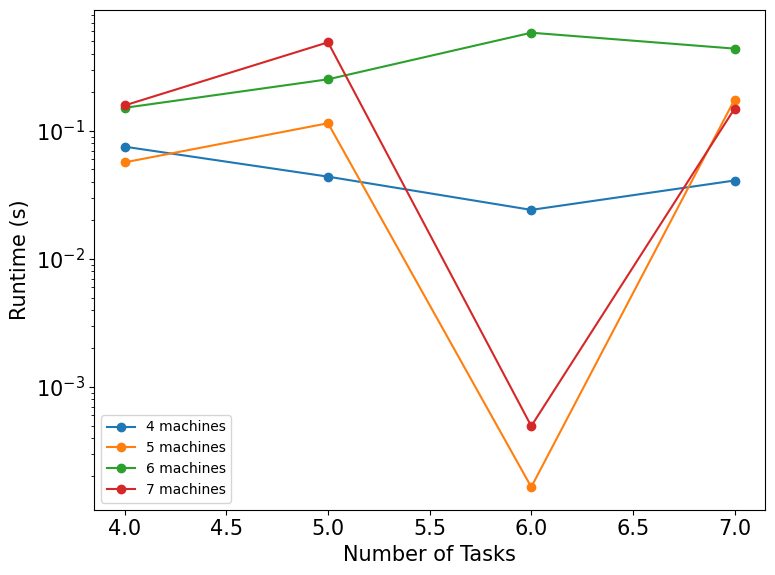

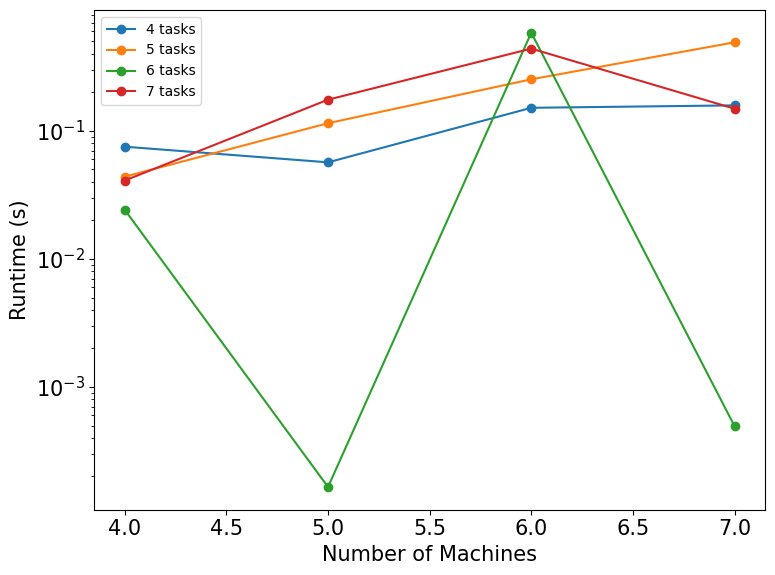

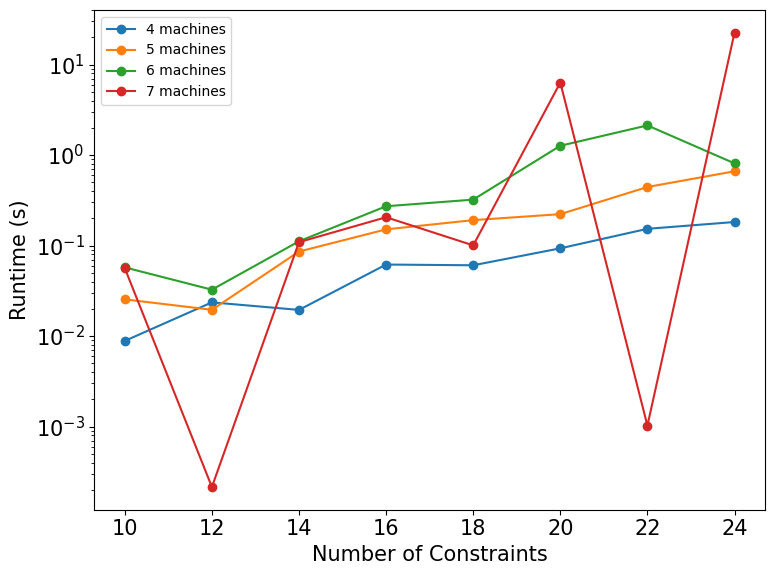

In [21]:
plot_scaling_results(result_times, result_times_constraints, n_machines_range, n_tasks_range, n_constraints_range, iterative=False)

In [23]:
np.random.seed(32)
n_machines_range_iter = (4,20)
n_tasks_range_iter = (4,20)
n_constraints_range_iter = (10,70)
base_tasks_iter = 5
base_constraints_iter = 25
n_samples_iter = 10
tau_iter = 100

result_times_iter, result_times_constraints_iter, steps_mach, steps_constraints  = measure_runtime_scaling_iterative(
    n_machines_range=n_machines_range_iter,
    n_tasks_range=n_tasks_range_iter, 
    n_constraints_range=n_constraints_range_iter,
    base_tasks=base_tasks_iter,
    base_constraints=base_constraints_iter,
    n_samples=n_samples_iter,
    tau=tau_iter
)

Testing machines/tasks scaling:
Progress: [==================================================] 810/810

Testing machines/constraints scaling:
Progress: [==================================================] 1440/1440



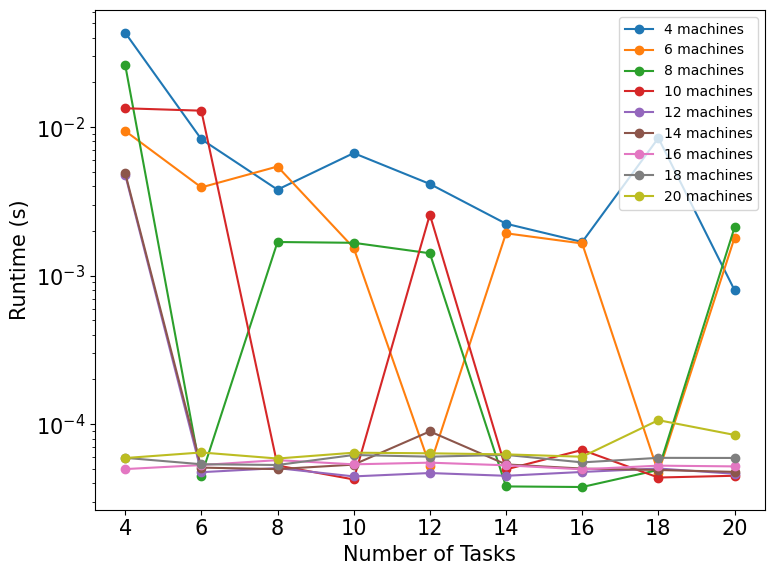

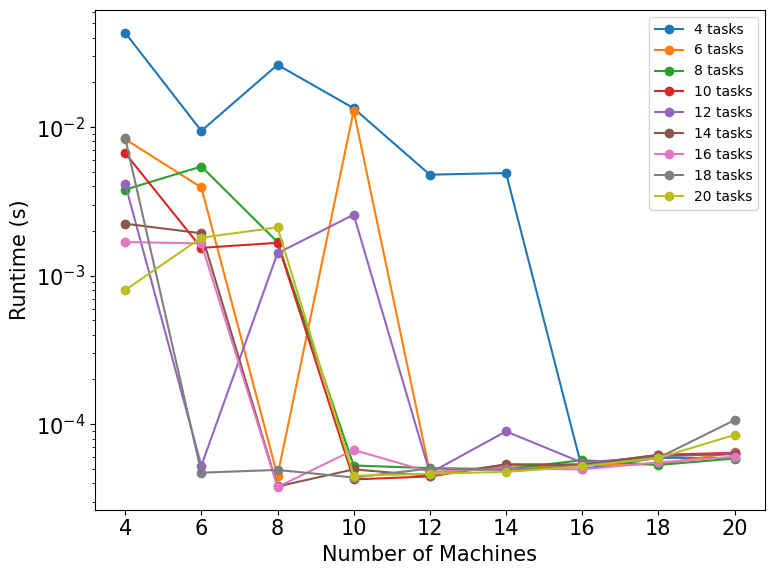

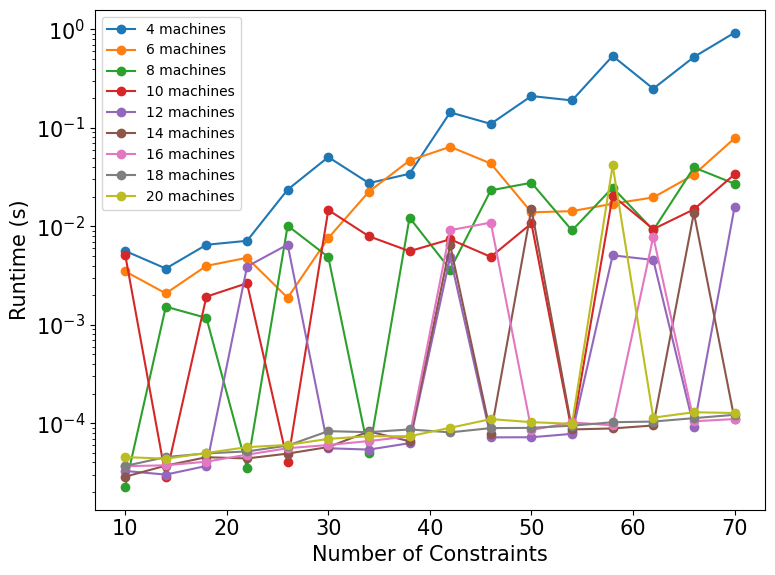

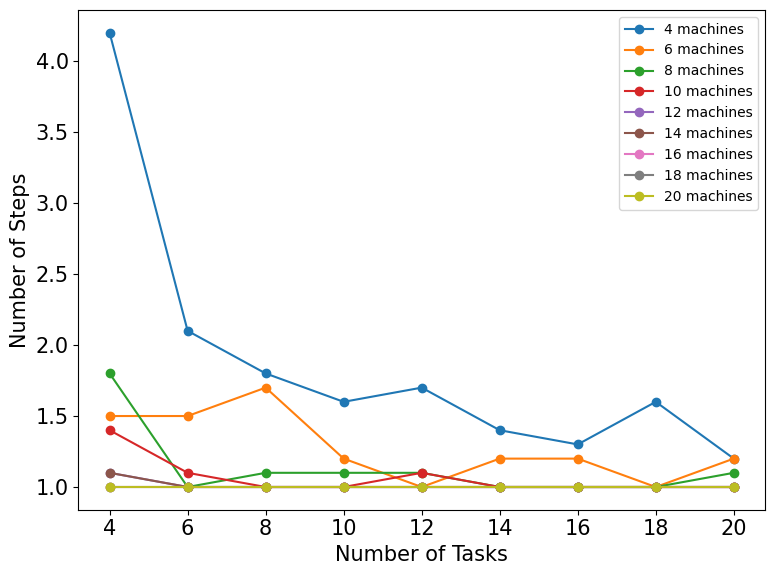

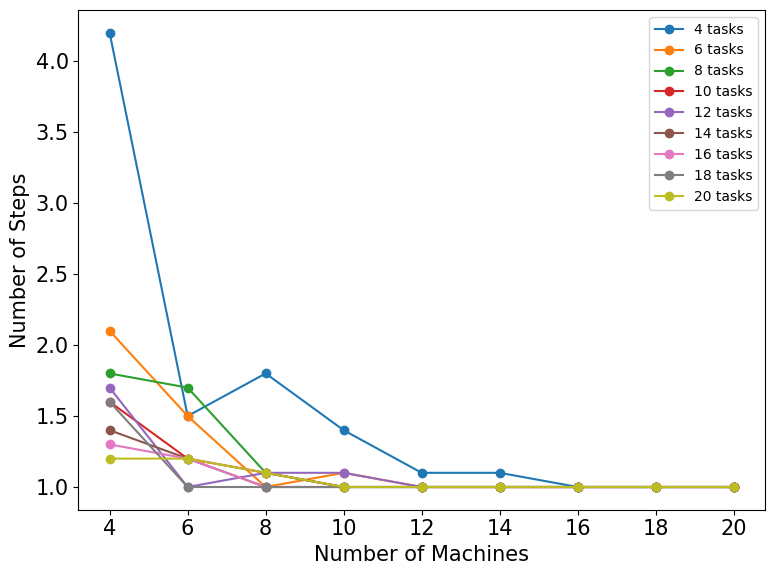

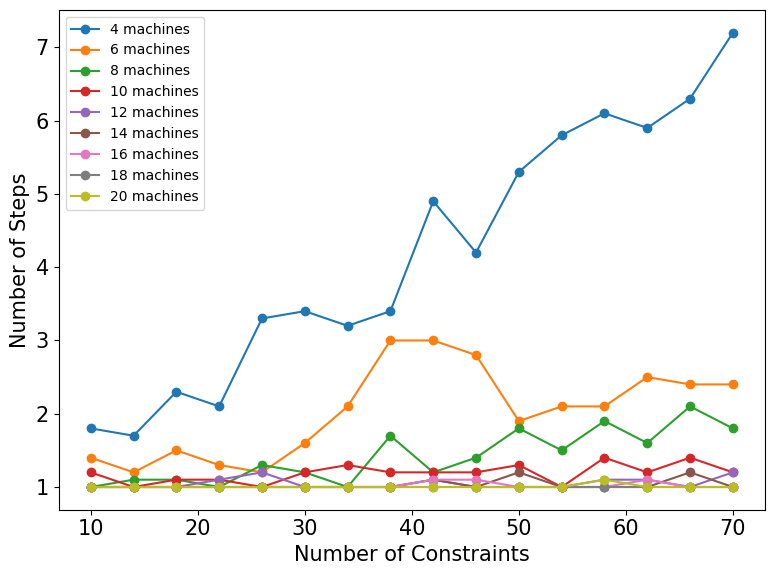

In [24]:
plot_scaling_results(result_times_iter, result_times_constraints_iter, n_machines_range_iter, n_tasks_range_iter, n_constraints_range_iter, iterative=True, steps_mach=steps_mach, steps_constraints=steps_constraints)

In [25]:
cocient = result_times_iter / steps_mach
cocient_2 = result_times_constraints_iter / steps_constraints

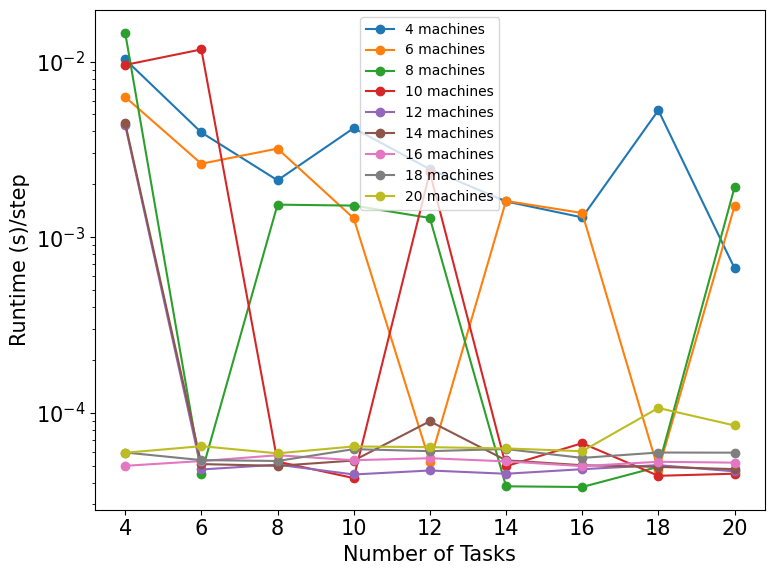

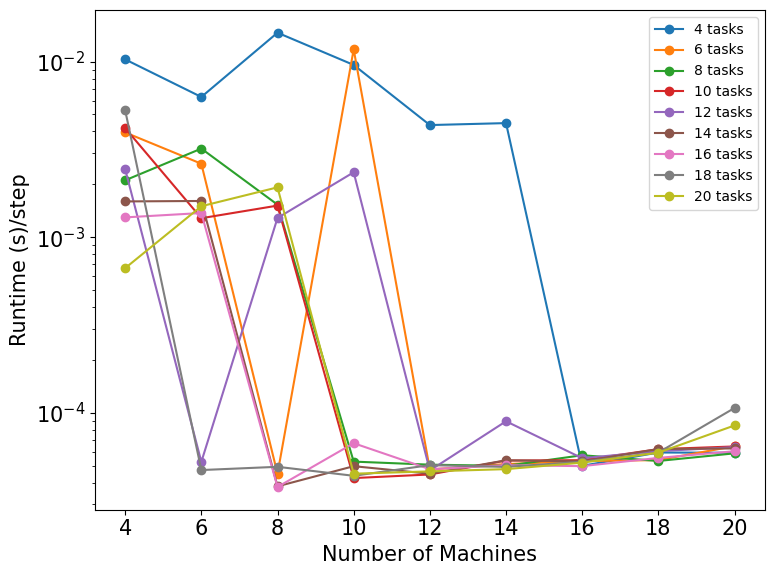

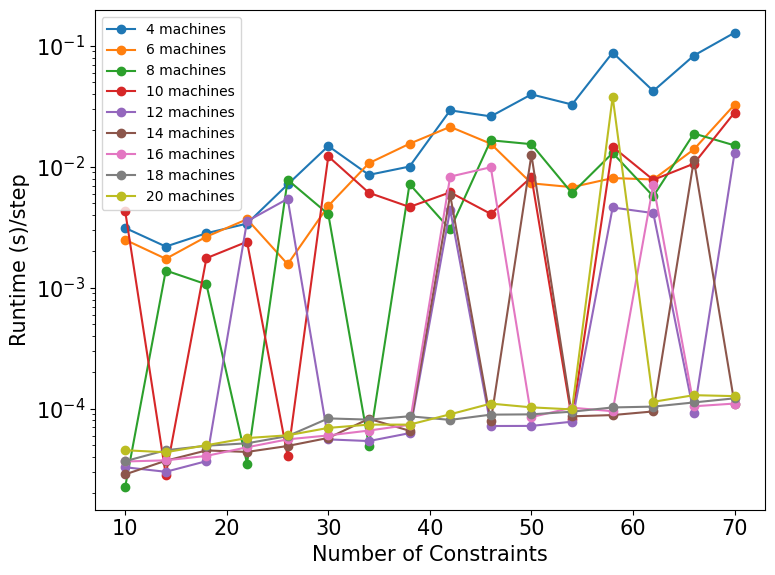

In [28]:
plot_cocient_results(cocient, cocient_2, n_machines_range_iter, n_tasks_range_iter, n_constraints_range_iter)

## Genetic tests

In [2]:
# Set random seed for reproducibility 
np.random.seed(120)

# Genetic algorithm parameters
num_indivs = 30
num_generations = 30
max_num_constraints = 10
num_used_tasks = 4
num_crosses = 5
num_muts = 5
parent_proportion = 3
tau = 100                # time window parameter for scheduling
iterative = True

# problem parameters
num_constraints = 30  # number of scheduling constraints to generate
num_machines_range =  (5,9)       # number of machines available
tasks_per_machine_range = (5,15)   # number of possible tasks per machine
num_samples = 10

machines_list = np.arange(num_machines_range[0], num_machines_range[1])
tasks_list = np.arange(tasks_per_machine_range[0], tasks_per_machine_range[1])

success_collection = np.zeros((len(machines_list), len(tasks_list)))
total_iterations = len(machines_list) * len(tasks_list) * num_samples
current_iteration = 0

for i, num_machines in enumerate(machines_list):
    for j, tasks_per_machine in enumerate(tasks_list):
        success_rate = 0
        for _ in range(num_samples):
            # Generate problem instance
            costs_list, constraints = create_instance(num_constraints, num_machines, tasks_per_machine)

            result = genetic_optimizer(
                constraints,
                costs_list,
                tau,
                num_indivs,
                num_generations,
                max_num_constraints,
                num_used_tasks,
                num_crosses,
                num_muts,
                iterative=iterative,
                parent_proportion=parent_proportion,
                verbose=False
            )[0]

            # Validate solution and calculate total processing time
            is_valid, violations = checker(constraints, result)
            if is_valid:
                success_rate += 1
                
            current_iteration += 1
            print(f'\rProgress: {current_iteration}/{total_iterations} ({(current_iteration/total_iterations)*100:.1f}%)', end='', flush=True)
        
        success_collection[i,j] = success_rate/num_samples

print('\nDone!')

Progress: 400/400 (100.0%)
Done!


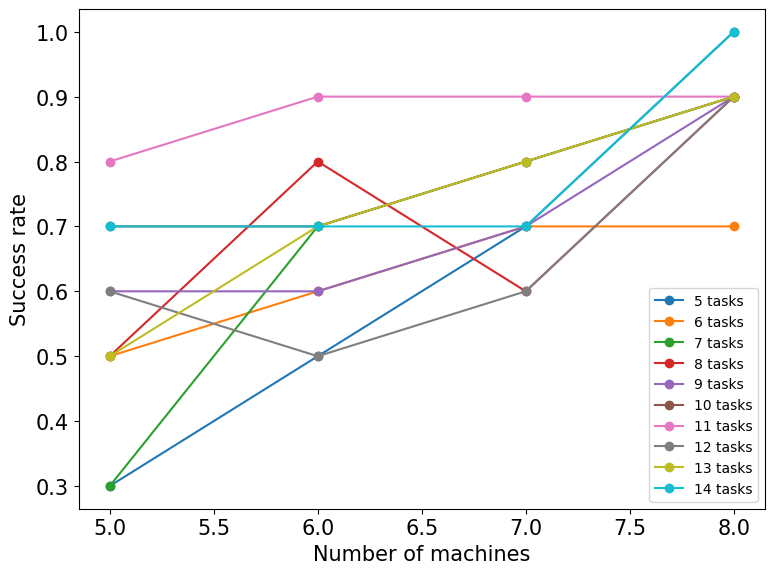

In [5]:
plt.figure(figsize=(8,6))
plt.xlabel('Number of machines')
plt.ylabel('Success rate')

for i, num_tasks in enumerate(tasks_list):
    plt.plot(machines_list, success_collection[:,i], 'o-', label=f'{num_tasks} tasks')

plt.legend()
plt.tight_layout()
plt.savefig('figures/Success_rate.pdf')
plt.show()